In [1]:
#import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats


In [2]:
#mount drive into google colab
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


• DOMAIN: Autonomous Vehicles

• CONTEXT: A Recognising multi-digit numbers in photographs captured at street level is an important component of modern-day map
making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery composed of hundreds of millions
of geo-located 360-degree panoramic images.

The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a
known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents. More broadly, recognising
numbers in photographs is a problem of interest to the optical character recognition community.

While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is
still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large
range of fonts, colours, styles, orientations, and character arrangements.
The recognition problem is further complicated by environmental factors such as lighting, shadows, specularity, and occlusions as well as
by image acquisition factors such as resolution, motion, and focus blurs. In this project, we will use the dataset with images centred around
a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simpler,
it is more complex than MNIST because of the distractors.

• DATA DESCRIPTION: The SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the
minimal requirement on data formatting but comes from a significantly harder, unsolved, real-world problem (recognising digits and
numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

**A. Read the .h5 file and assign to a variable.**

In [3]:
import h5py

vehicle=h5py.File("/content/drive/My Drive/Colab Notebooks/Deep Learning/Autonomous_Vehicles_SVHN_single_grey1.h5", 'r')

**B. Print all the keys from the .h5 file.**

In [4]:
print(vehicle.keys())

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>


**C. Split the data into X_train, X_test, Y_train, Y_test**

In [5]:
X_test=vehicle['X_test']
X_train=vehicle['X_train']
X_val=vehicle['X_val']
y_test=vehicle['y_test']
y_train=vehicle['y_train']
y_val=vehicle['y_val']

## **2. Data Visualisation and preprocessing**

**A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.**

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((42000, 32, 32), (18000, 32, 32), (42000,), (18000,))

In [7]:
X_val.shape, y_val.shape

((60000, 32, 32), (60000,))

**B. Visualise first 10 images in train data and print its corresponding labels.**

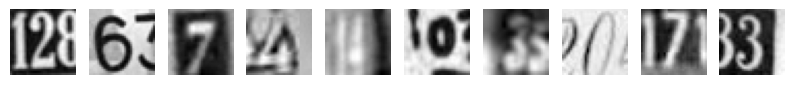

label: [2 6 7 4 4 0 3 0 7 3]


In [8]:
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.axis('off')
plt.show()

print('label:', y_train[0:10])


**C. Reshape all the images with appropriate shape update the data in same variable.**

In [9]:
X_train= np.asarray(X_train).reshape(42000, 1024)
X_test= np.asarray(X_test).reshape(18000, 1024)
X_val= np.asarray(X_val).reshape(60000, 1024)

**D. Normalise the images i.e. Normalise the pixel values.**

In [10]:
X_train=X_train/255.0
X_test=X_test/255.0
X_val=X_val/255.0

X_train.shape, X_test.shape, X_val.shape

((42000, 1024), (18000, 1024), (60000, 1024))

**E. Transform Labels into format acceptable by Neural Network**

In [11]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
y_val=to_categorical(y_val)

**F. Print total Number of classes in the Dataset.**

In [12]:
classes=y_test.shape[1]
print("total Number of classes in the Dataset:", classes)

total Number of classes in the Dataset: 10


## **3. Model Training & Evaluation using Neural Network**

**A. Design a Neural Network to train a classifier.**

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend
import random


In [16]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

model_v=Sequential()
# input layer
model_v.add(Dense(256, activation='relu'))
model_v.add(Dense(128, activation='relu')) #1st hidden layer
model_v.add(Dense(64, activation='relu')) #2nd hidden layer
model_v.add(Dense(32, activation='relu'))  # 3rd hidden layer
model_v.add(Dense(10, activation='softmax'))

**B. Train the classifier using previously designed Architecture (Use best suitable parameters).**

In [17]:
adam=Adam(learning_rate=0.001)
model_v.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
history_v1=model_v.fit(X_train, y_train, epochs=100, batch_size=200, validation_data=(X_val, y_val), verbose=2)

Epoch 1/100
210/210 - 6s - 29ms/step - accuracy: 0.1138 - loss: 2.2946 - val_accuracy: 0.1529 - val_loss: 2.2039
Epoch 2/100
210/210 - 2s - 9ms/step - accuracy: 0.2154 - loss: 2.0937 - val_accuracy: 0.3437 - val_loss: 1.8859
Epoch 3/100
210/210 - 2s - 9ms/step - accuracy: 0.4326 - loss: 1.6440 - val_accuracy: 0.5476 - val_loss: 1.3823
Epoch 4/100
210/210 - 1s - 5ms/step - accuracy: 0.5640 - loss: 1.3246 - val_accuracy: 0.6176 - val_loss: 1.2029
Epoch 5/100
210/210 - 1s - 6ms/step - accuracy: 0.6187 - loss: 1.1904 - val_accuracy: 0.6514 - val_loss: 1.1171
Epoch 6/100
210/210 - 1s - 5ms/step - accuracy: 0.6609 - loss: 1.0835 - val_accuracy: 0.6646 - val_loss: 1.0655
Epoch 7/100
210/210 - 1s - 5ms/step - accuracy: 0.6835 - loss: 1.0181 - val_accuracy: 0.6828 - val_loss: 1.0138
Epoch 8/100
210/210 - 1s - 6ms/step - accuracy: 0.6985 - loss: 0.9733 - val_accuracy: 0.7011 - val_loss: 0.9623
Epoch 9/100
210/210 - 1s - 5ms/step - accuracy: 0.7072 - loss: 0.9427 - val_accuracy: 0.7040 - val_loss

In [19]:
results_v=model_v.evaluate(X_test, y_test)
print('loss:', results_v[0])
print('accuracy:', results_v[1])

563/563 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8062 - loss: 0.7120
loss: 0.7445113062858582
accuracy: 0.8008333444595337


In [20]:
y_predict=model_v.predict(X_test)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


**C. Evaluate performance of the model with appropriate metrics.**

**D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.**

In [21]:
from sklearn import metrics
from sklearn.metrics import classification_report

vehicle_cr=classification_report(y_test.argmax(axis=1), y_predict.argmax(axis=1))

print('performance metrics:', '\n\n', vehicle_cr)



performance metrics: 

               precision    recall  f1-score   support

           0       0.80      0.83      0.82      1814
           1       0.79      0.84      0.82      1828
           2       0.83      0.82      0.83      1803
           3       0.73      0.78      0.75      1719
           4       0.78      0.85      0.82      1812
           5       0.79      0.75      0.77      1768
           6       0.85      0.76      0.80      1832
           7       0.87      0.82      0.84      1808
           8       0.78      0.76      0.77      1812
           9       0.81      0.79      0.80      1804

    accuracy                           0.80     18000
   macro avg       0.80      0.80      0.80     18000
weighted avg       0.80      0.80      0.80     18000



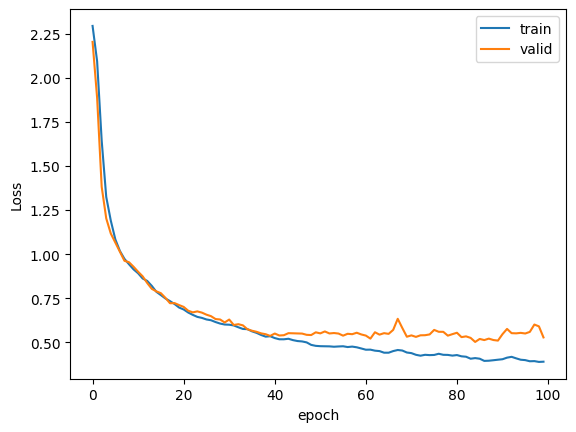

In [22]:
#capturing learning details per epoch
result_v=pd.DataFrame(history_v1.history)
result_v['epoch']=history_v1.epoch

# plotting Training loss and Validation loss
plt.plot(result_v['loss'])
plt.plot(result_v['val_loss'])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(("train", "valid"), loc=0)

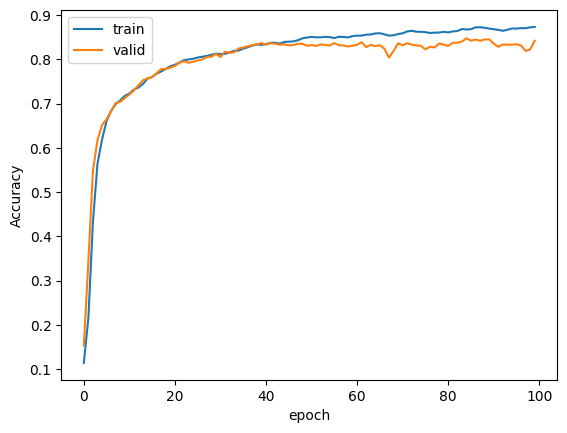

In [23]:
# plotting Training loss and Validation loss
plt.plot(result_v['accuracy'])
plt.plot(result_v['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(("train", "valid"), loc=0)

The model was built using simple neural network with 10 classes in the dataset.

we could see from the built NN the accuracy for this model achieved is 80% on test data.

From the **performance metrics** we could see that the precision which tells how accuartely the model identifies the each class predicted between 75%-87% of them right.

Recall:identified each actual instances correctly with percentage between 74-86%.

F1: balanced both the precision and recall.

From graph it looks that the loss in training (0.40) and validation (0.50) is closely converging at 0.45 and at test the loss is 0.70. Similar is seen with the accuracy in train (87%) and validation (84%) and at test the accuracy is at 81%. This could be achievable at best suitable parameters: epoch =100, batch_size=200, adam optimizer with learning rate 0.001.

**New model with Batch Normalization.**

In [24]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

model_v_1=Sequential()
# input layer
model_v_1.add(Dense(256, activation='relu', kernel_initializer='he_normal', input_shape=(1024,)))
model_v_1.add(BatchNormalization())
model_v_1.add(Dense(128, activation='relu', kernel_initializer='he_normal')) #1st hidden layer
model_v_1.add(BatchNormalization())
model_v_1.add(Dense(64, activation='relu', kernel_initializer='he_normal')) #2nd hidden layer
model_v_1.add(BatchNormalization())
model_v_1.add(Dense(32, activation='relu', kernel_initializer='he_normal')) # 3rd hidden layer
model_v_1.add(BatchNormalization())
model_v_1.add(Dense(10, activation='softmax'))

adam=Adam(learning_rate=0.001)

model_v_1.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model_v_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 307,882 (1.17 MB)

 Trainable params: 306,922 (1.17 MB)

 Non-trainable params: 960 (3.75 KB)

In [26]:
history_v2=model_v_1.fit(X_train, y_train, epochs=100, batch_size=200, validation_data=(X_val, y_val), verbose=2)

Epoch 1/100
210/210 - 7s - 33ms/step - accuracy: 0.4849 - loss: 1.5824 - val_accuracy: 0.4150 - val_loss: 1.7818
Epoch 2/100
210/210 - 2s - 8ms/step - accuracy: 0.6811 - loss: 1.0258 - val_accuracy: 0.3198 - val_loss: 2.0879
Epoch 3/100
210/210 - 1s - 7ms/step - accuracy: 0.7280 - loss: 0.8733 - val_accuracy: 0.4461 - val_loss: 1.7430
Epoch 4/100
210/210 - 1s - 7ms/step - accuracy: 0.7570 - loss: 0.7801 - val_accuracy: 0.4713 - val_loss: 1.7156
Epoch 5/100
210/210 - 1s - 7ms/step - accuracy: 0.7795 - loss: 0.7110 - val_accuracy: 0.5311 - val_loss: 1.5369
Epoch 6/100
210/210 - 2s - 11ms/step - accuracy: 0.7886 - loss: 0.6758 - val_accuracy: 0.6057 - val_loss: 1.2722
Epoch 7/100
210/210 - 1s - 6ms/step - accuracy: 0.8053 - loss: 0.6204 - val_accuracy: 0.6677 - val_loss: 1.0645
Epoch 8/100
210/210 - 1s - 5ms/step - accuracy: 0.8182 - loss: 0.5817 - val_accuracy: 0.7317 - val_loss: 0.8643
Epoch 9/100
210/210 - 1s - 7ms/step - accuracy: 0.8264 - loss: 0.5583 - val_accuracy: 0.6096 - val_los

In [27]:
results_test_batch=model_v.evaluate(X_test, y_test)
print('loss:', results_test_batch[0])
print('accuracy:', results_test_batch[1])

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8062 - loss: 0.7120
loss: 0.7445113062858582
accuracy: 0.8008333444595337


In [28]:
y_predict_batch=model_v.predict(X_test)

from sklearn import metrics
from sklearn.metrics import classification_report

vehicle_batch=classification_report(y_test.argmax(axis=1), y_predict_batch.argmax(axis=1))

print('performance metrics:', '\n\n', vehicle_batch)

563/563 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
performance metrics: 

               precision    recall  f1-score   support

           0       0.80      0.83      0.82      1814
           1       0.79      0.84      0.82      1828
           2       0.83      0.82      0.83      1803
           3       0.73      0.78      0.75      1719
           4       0.78      0.85      0.82      1812
           5       0.79      0.75      0.77      1768
           6       0.85      0.76      0.80      1832
           7       0.87      0.82      0.84      1808
           8       0.78      0.76      0.77      1812
           9       0.81      0.79      0.80      1804

    accuracy                           0.80     18000
   macro avg       0.80      0.80      0.80     18000
weighted avg       0.80      0.80      0.80     18000



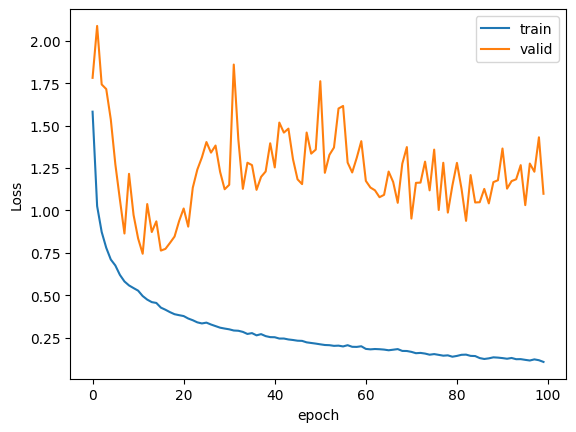

In [29]:
#capturing learning details per epoch
result_batch=pd.DataFrame(history_v2.history)
result_batch['epoch']=history_v2.epoch

# plotting Training loss and Validation loss
plt.plot(result_batch['loss'])
plt.plot(result_batch['val_loss'])
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(("train", "valid"), loc=0)

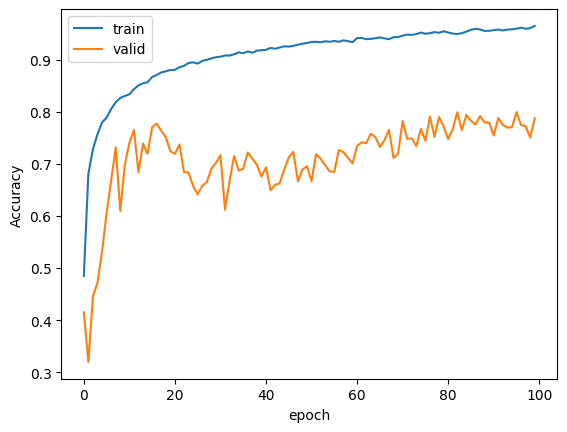

In [30]:
# plotting Training loss and Validation loss
plt.plot(result_batch['accuracy'])
plt.plot(result_batch['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.legend(("train", "valid"), loc=0)

When tried to build the new model with batchnormalization and kernel initiliazer the model seems to be overfitting on training data at accuracy of 95% and the loss 0.11. The train and validation loss doesnt converge at all and the loss at the validation is more. This isnt the best model.

**From studying the housing dataset, simple neural network with relu activation function gave the best converging at train and test and also at the accuracy. With the decent amount of accuracy at 81% on test data, we will be able to distinguish digits in the datset.**